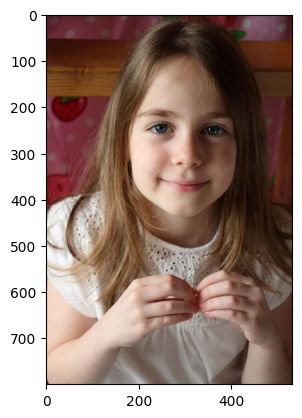

True

In [1]:
import matplotlib.pyplot as plt
import cv2

filepath = '/content/drive/MyDrive/kdt_240424/m8_vision응용/data/girl.png'
img = cv2.imread(filepath)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.show()

cv2.imwrite('/content/drive/MyDrive/kdt_240424/m8_vision응용/data/girl1.png',img)

In [3]:
img.shape

(800, 533, 3)

(800, 533, 3)
(500, 600, 3)


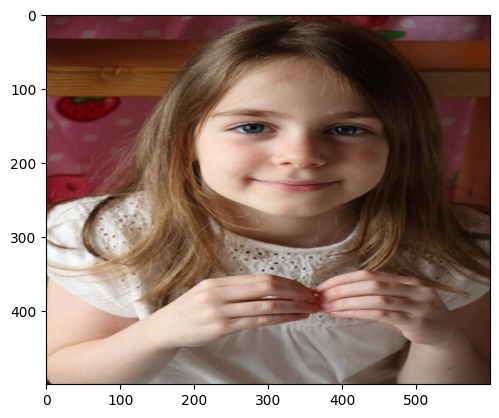

In [4]:
filepath = '/content/drive/MyDrive/kdt_240424/m8_vision응용/data/girl1.png'
girl = cv2.imread(filepath)
print(girl.shape)

resize_girl = cv2.resize(girl, dsize = (600,500))

cv2.imwrite('/content/drive/MyDrive/kdt_240424/m8_vision응용/data/resize_girl.png',resize_girl)

print(resize_girl.shape)

plt.imshow(cv2.cvtColor(resize_girl,cv2.COLOR_BGR2RGB))
plt.show()

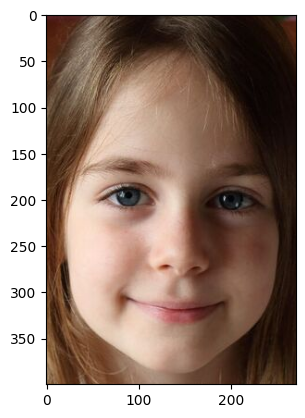

In [11]:
girl_face = girl[50:450,160:430]
plt.imshow(cv2.cvtColor(girl_face, cv2.COLOR_BGR2RGB))
plt.show()

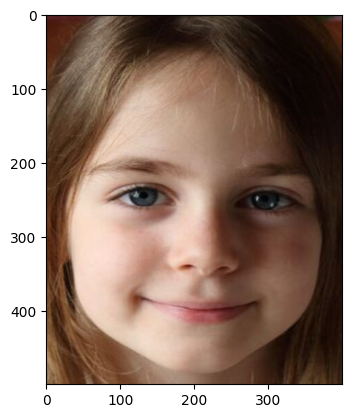

In [12]:
girl_face = cv2.resize(girl_face, (400,500))

cv2.imwrite('/content/drive/MyDrive/kdt_240424/m8_vision응용/data/cut-girl.png',girl_face)

plt.imshow(cv2.cvtColor(girl_face,cv2.COLOR_BGR2RGB))
plt.show()

[얼굴 검출 캐스케이드-얼굴 요소 데이터베이스]

https://github.com/opencv/opencv/tree/master/data/haarcascades


- 캐스케이드 파일은 컴퓨터 비전에서 객체 검출에 사용되는 파일로, 특히 Haar Cascade 분류기에 의해 사용됩니다. 이 파일은 얼굴, 눈, 차량 번호판 등과 같은 객체를 검출하기 위해 사전에 학습된 데이터를 포함합니다. Haar Cascade는 Paul Viola와 Michael Jones에 의해 개발된 알고리즘으로, 빠른 객체 검출을 가능하게 하는 여러 단계의 분류기로 구성됩니다.

- 캐스케이드 파일(.xml 형식)은 사전에 학습된 특징들의 집합을 포함하며, 이 특징들은 객체 검출 과정에서 사용됩니다. 예를 들어, 얼굴 검출을 위한 캐스케이드 파일은 얼굴의 특정 부분(눈, 코, 입 등)이 가지는 빛과 그림자의 패턴을 인식할 수 있는 데이터를 포함합니다. 이 데이터는 이미지에서 얼굴을 효과적으로 찾아내는 데 사용됩니다.

[ 사용 방법 ]
- cv2.CascadeClassifier 함수를 사용하여 사전에 학습된 캐스케이드 파일을 로드. 이 파일은 얼굴, 눈 등을 검출하기 위해 필요한 정보를 포함
- 대상 이미지를 그레이스케일로 변환합니다. Haar 기능은 그레이스케일 이미지에서 더 잘 작동하기 때문임.
- 분류기의 detectMultiScale 메소드를 사용하여 이미지 내의 객체를 검출. 이 메소드는 이미지 내에서 캐스케이드 파일에 정의된 패턴을 찾으려 시도. 각 객체에 대해 위치와 크기(사각형으로 표현됨)가 반환


얼굴의 좌표= 148 125 315 315


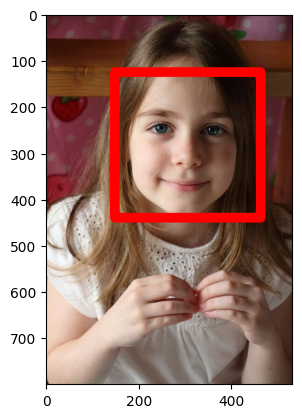

In [14]:
import matplotlib.pyplot as plt
import cv2

# 캐스케이드 파일 지정해서 검출기 생성하기
# opencv는 haar-like 특징 학습기라고 부르는 머신러닝을 상요해 얼굴 인식
# 캐스케이드 파일(얼굴 요소 DB)를 사용해 눈, 코, 입과 같은 요소의 위치 관계를 확인하고 얼굴인지 확인
# 얼굴 검출 전용 캐스케이드 파일 외 정면 얼굴, 웃는 얼굴, 눈, 몸 전체를 검출하는 다양한 캐스케이드 파일
cascade_file = '/content/drive/MyDrive/kdt_240424/m8_vision응용/data/haarcascade_frontalface_alt.xml' #정면 얼굴
cascade = cv2.CascadeClassifier(cascade_file) # 검출기는 캐스케이드 파일을 지정해 다양한 물체 검출


#  이미지를 읽어 들이고 그레이스케일로 변환하기
# 밝은 부분은 흰색, 어두운 부분은 검은색, 코는 밝은 부분, 코의 양옆은 어두운 부분
# 얼굴 영역중에 중앙에 밝은 부분이 있다면 얼굴로 판단, 각 요소의 명암패턴을 결합해 얼굴의 형태 확인
filepath = '/content/drive/MyDrive/kdt_240424/m8_vision응용/data/girl1.png'
img = cv2.imread(filepath)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 얼굴 인식하기(cascade.detectMultiScale()메서드 사용)
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150)) # 그레이스케일 이미지데이터, 얼굴 인식영역의 최소 크기 지정
# 결과 확인하기
if len(face_list) == 0: # 검출 결과를 확인 후 리스트가 비어있으면 메시지 출력 후 종료
    print("얼굴 인식 실패")
    print()

# 인식한 부분 표시하기 # 검출한 얼굴 영역에 붉은색 테두리를 랜더링
for (x,y,w,h) in face_list:
    print("얼굴의 좌표=", x,y,w,h)
    red = (0,0,255)
    cv2.rectangle(img, (x,y), (x+w, y+h), red, thickness=20)

# 이미지 출력하기
cv2.imwrite('/content/drive/MyDrive/kdt_240424/m8_vision응용/data/face-detect.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
!cp /content/drive/MyDrive/kdt_240424/m8_vision응용/data/mosaic.py /content

In [17]:
!ls

drive  mosaic.py  sample_data


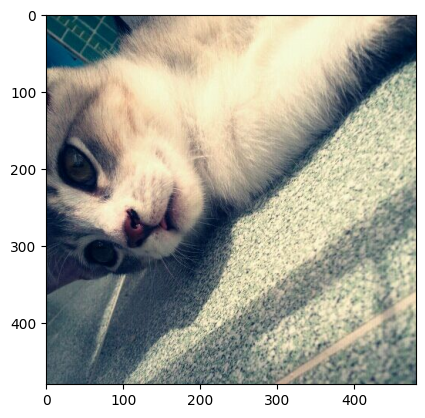

In [18]:
img = cv2.imread('/content/drive/MyDrive/kdt_240424/m8_vision응용/data/cat.png')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
import cv2
# 축소 및 확대 과정을 통해 이미지의 특정 부분이 모자이크처럼 흐릿해지는 효과를 만듭니다
def mosaic(img, rect, size):
    # 모자이크 적용할 부분 추출하기
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2,x1:x2]
    # 축소하고 확대하기 : size를 n으로 설정하면, 원본 이미지의 선택된 부분을 nxn 픽셀 크기로 축소한 뒤, 이를 다시 원래의 크기로 확대
    i_small = cv2.resize(i_rect, (size,size)) # 모자이크를 적용할 이미지의 부분을 추출. size x size는 축소될 이미지의 새로운 해상도를 의미
    i_mos = cv2.resize(i_small, (w,h), interpolation=cv2.INTER_AREA) # 보간법
    # 모자이크 적용하기
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2


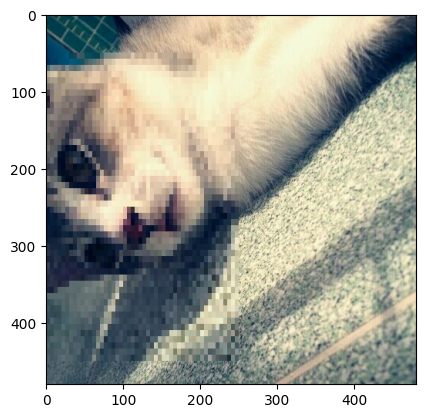

In [20]:
import cv2
# from mosaic import mosaic as mosaic
img = cv2.imread('/content/drive/MyDrive/kdt_240424/m8_vision응용/data/cat.png')
mos = mosaic(img, (0,50,250,450), 50) # size가 작아질수록 모자이크의 정도가 심해진다

cv2.imwrite('/content/drive/MyDrive/kdt_240424/m8_vision응용/data/cat-mosaic.png',mos)
plt.imshow(cv2.cvtColor(mos,cv2.COLOR_BGR2RGB))
plt.show()

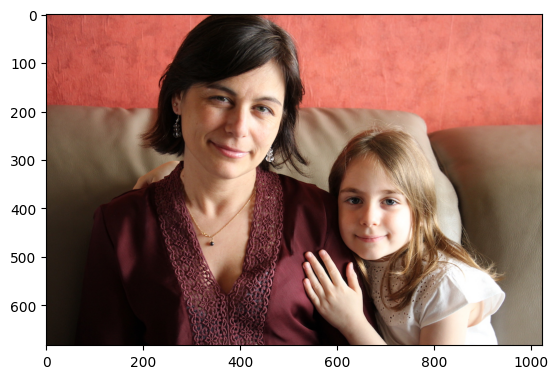

In [21]:
img = cv2.imread('/content/drive/MyDrive/kdt_240424/m8_vision응용/data/people.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

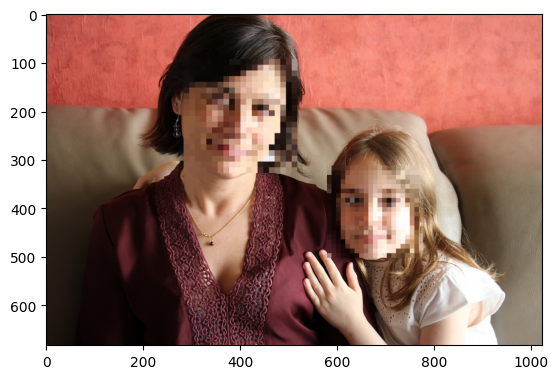

In [14]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      import matplotlib.pyplot as plt
import cv2


cascade_file = '/content/drive/MyDrive/kdt_240424/m8_vision응용/data/haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)



img = cv2.imread('/content/drive/MyDrive/kdt_240424/m8_vision응용/data/people.jpg')
# img = cv2.imread(filepath)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 얼굴 인식하기(cascade.detectMultiScale()메서드 사용)
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))

# 결과 확인하기
if len(face_list) == 0: quit()

# 인식한 부분 표시하기 # 검출한 얼굴 영역에 붉은색 테두리를 랜더링
for (x,y,w,h) in face_list:
    img = mosaic(img, (x,y,x+w,y+h), 20)

# 이미지 출력하기
cv2.imwrite('/content/drive/MyDrive/kdt_240424/m8_vision응용/data/mosaic.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


(367, 652, 3)


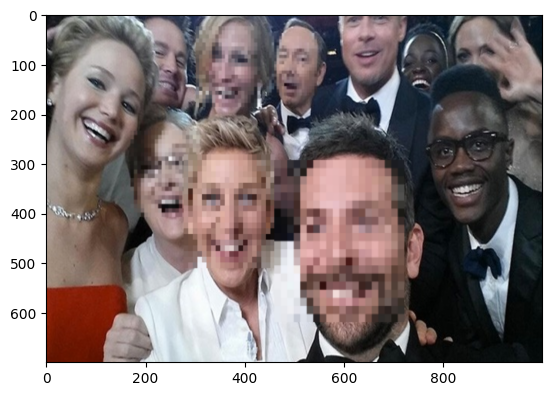

In [24]:
import cv2
import matplotlib.pyplot as plt
from mosaic import mosaic as mosaic
cascade_file = '/content/drive/MyDrive/kdt_240424/m8_vision응용/data/haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

img = cv2.imread('/content/drive/MyDrive/kdt_240424/m8_vision응용/data/people2.jpg')
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img_color.shape)

face_list = cascade.detectMultiScale(img_color, minSize=(20,20))


if len(face_list) == 0: quit()

# 인식한 부분 표시하기 # 검출한 얼굴 영역에 붉은색 테두리를 랜더링
for (x,y,w,h) in face_list:
    img = mosaic(img, (x,y,x+w,y+h), 20)

resize_img = cv2.resize(img, (1000,700))  # 원하는 크기로 조정

# 이미지 출력
plt.imshow(cv2.cvtColor(resize_img, cv2.COLOR_BGR2RGB))

plt.show()